# Visualize Networkss

In [2]:
# Mathematical and Data Managment
import numpy as np
import pandas as pd
import scipy.sparse as sp

# Graph Managment
import graph_tool.all as gt
import networkx as nx
#from utils.Functions import *
#from utils.Segregation import *

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from forceatlas2 import forceatlas2_networkx_layout

# Miscellaneous
import pickle
from glob import glob
from tqdm import tqdm
import random

In [6]:
# Load the graph
g = gt.load_graph("/mnt/disk2/Data/3_Day_Graphs/2021-05-03.graphml")
g

<Graph object, directed, with 36925 vertices and 607679 edges, 4 internal vertex properties, 4 internal edge properties, at 0x7f1548102190>

In [7]:
#pos_fruchterman_reingold Layout
pos_fruchterman_reingold = gt.fruchterman_reingold_layout(g, weight=g.ep['Normal Weights'])
#pos_sfdp = gtd.sfdp_layout(g)

In [15]:
with open("/mnt/disk2/Data/Pickle/pos_fruchterman_reingold.pkl", "wb") as f:
    pickle.dump(pos_fruchterman_reingold, f)

In [ ]:
# Assign colors based on 'Political Affiliation'
color_dict = {
    'No Retweets': [0.5, 0.5, 0.5, 1],        # Gray for 'No Retweets'
    'Retweets Centro': [0, 1, 0, 1],          # Green for 'Retweets Centro'
    'Retweets Derecha': [1, 0, 0, 1],         # Red for 'Retweets Derecha'
    'Retweets Izquierda': [0, 0, 1, 1],       # Blue for 'Retweets Izquierda'
}

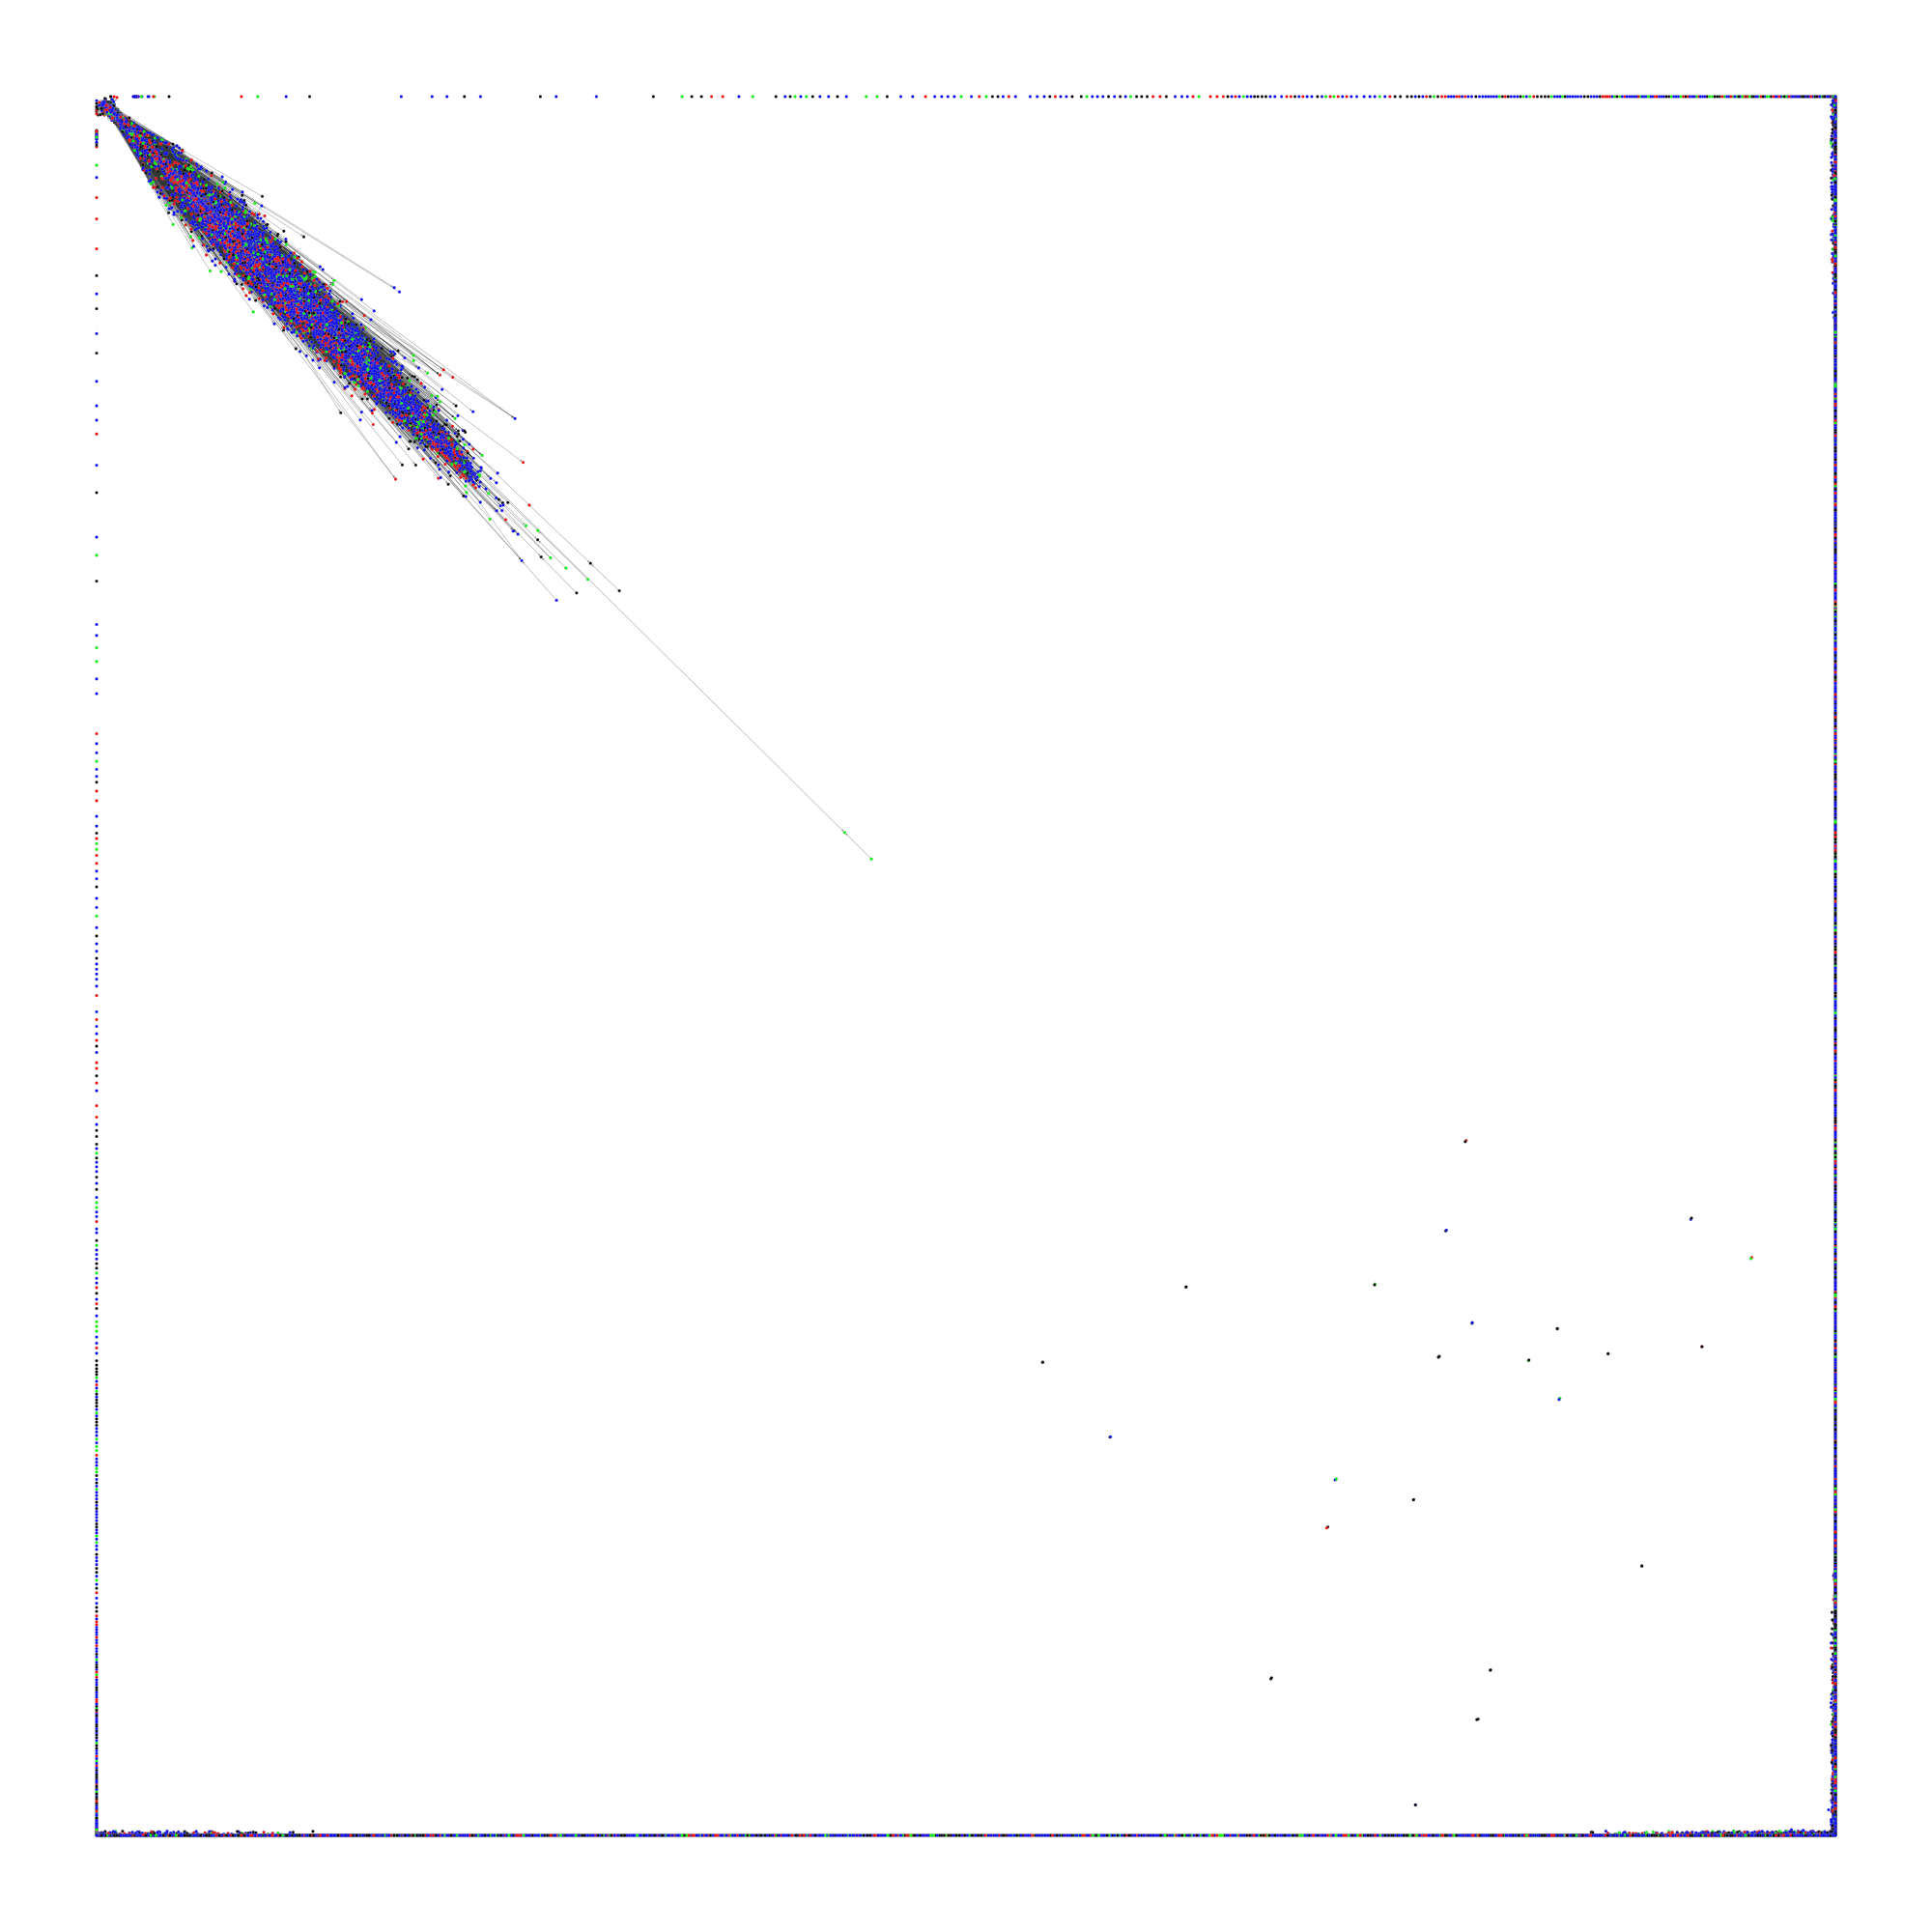

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f2c94af7050, at 0x7f2c90bfe690>

In [9]:
# Draw the graph
gt.graph_draw(g, pos_fruchterman_reingold, vertex_fill_color = g.vp['Color'], output_size = (1000, 1000))

In [19]:
def fraction_graph(g,percentage, seed=437):
    random.seed(seed)
    # Get the total number of vertices and edges
    edge_list = list(g.iter_edges())
    vertex_list = list(g.iter_vertices())

    # Calculate the number of vertices and edges for the subgraph
    num_subgraph_vertices = int(len(vertex_list) * (percentage / 100))
    num_subgraph_edges = int(len(edge_list) * (percentage / 100))

    # Get random indices for vertices and edges
    selected_vertices = random.sample(vertex_list, num_subgraph_vertices)

    # Filter edges connected to nodes labeled type
    filtered_edges = g.new_edge_property("bool")
    filtered_edges.a = False

    # Filter nodes with label type
    filtered_nodes = g.new_vertex_property("bool")
    filtered_nodes.a = False
            
    for v in g.iter_vertices():
        if v in selected_vertices:
            vertex = g.vertex(v)
            filtered_nodes[vertex] = True
            for e in vertex.all_edges():
                edge_tuple = [int(e.source()), int(e.target())]
                if edge_tuple in edge_list:
                    filtered_edges[e] = True

    subgraph = gt.GraphView(g,vfilt=filtered_nodes, efilt=filtered_edges)
    return subgraph

In [18]:
def to_networkx(g: gt.Graph) -> nx.Graph:
    
    if g.is_directed():
        nx_graph = nx.DiGraph()
    else:
        nx_graph = nx.Graph()

    # Add nodes with their properties to the NetworkX graph
    for v in g.vertices():
        node_properties = {prop_name: g.vp[prop_name][v] for prop_name in g.vp}
        nx_graph.add_node(int(v), **node_properties)

    # Add edges with their properties to the NetworkX graph
    for e in g.edges():
        edge_properties = {prop_name: g.ep[prop_name][e] for prop_name in g.ep}
        nx_graph.add_edge(int(e.source()), int(e.target()), **edge_properties)
    
    return nx_graph

In [60]:
# Generate random positions for the nodes
master_id = pd.read_csv('/mnt/disk2/Data/3_Day_Graphs/Nodes.csv', sep = ';')
pos = {i: (random.random(), random.random()) for i in master_id['Idx in Graph']}

# Calculate aesthetics fo visualization
colors = list(master_id['Color'])

In [65]:
master_id['Idx in Graph']

0            0
1            1
2            2
3            3
4            4
         ...  
36959    36959
36960    36960
36961    36961
36962    36962
36963    36963
Name: Idx in Graph, Length: 36964, dtype: int64

In [74]:
xd = set(set(g_nx.nodes) - set(master_id['Idx in Graph']))
xd

{36964,
 36965,
 36966,
 36967,
 36968,
 36969,
 36970,
 36971,
 36972,
 36973,
 36974,
 36975,
 36976,
 36977,
 36978,
 36979,
 36980,
 36981,
 36982,
 36983,
 36984,
 36985,
 36986,
 36987,
 36988,
 36989,
 36990,
 36991,
 36992,
 36993,
 36994,
 36995,
 36996,
 36997,
 36998,
 36999,
 37000,
 37001,
 37002,
 37003,
 37004,
 37005,
 37006,
 37007,
 37008,
 37009,
 37010,
 37011,
 37012,
 37013,
 37014,
 37015,
 37016,
 37017,
 37018,
 37019,
 37020,
 37021,
 37022,
 37023,
 37024,
 37025,
 37026,
 37027,
 37028,
 37029,
 37030,
 37031,
 37032,
 37033,
 37034,
 37035,
 37036,
 37037,
 37038,
 37039,
 37040,
 37041,
 37042,
 37043,
 37044,
 37045,
 37046,
 37047,
 37048,
 37049,
 37050,
 37051,
 37052,
 37053,
 37054,
 37055,
 37056,
 37057,
 37058,
 37059,
 37060,
 37061,
 37062,
 37063,
 37064,
 37065,
 37066,
 37067,
 37068,
 37069,
 37070,
 37071,
 37072,
 37073,
 37074,
 37075,
 37076,
 37077,
 37078,
 37079,
 37080,
 37081,
 37082,
 37083,
 37084,
 37085,
 37086,
 37087,
 37088,


In [82]:
print(g.ep['Ending date'].get_2d_array([0]))

[['2021-06-12' '2021-06-12' '2021-06-12' ... '2021-06-12' '2021-06-12'
  '2021-06-12']]


KeyError: 12

In [92]:
g.vp['Label'][37000]

'AndrsLopez1925'

In [95]:
files[0]

'/mnt/disk2/Data/3_Day_Graphs/2021-06-12.graphml'

In [57]:
files = glob('/mnt/disk2/Data/3_Day_Graphs/*.graphml')
random.seed(4)
for idx, file in enumerate(files):
    g = gt.load_graph(file)
    g_nx = to_networkx(g)
    date = file.split('.')[-2].split('/')[-1]
    
    # Initalizice Layout
    if idx == 0:
        
        # Node Size
        node_in_degree = [g_nx.in_degree(node) for node in g_nx.nodes]

        # For Layout Algorythim, calculate it as undirected
        g_nx_undir = g_nx.to_undirected()

        # Apply ForceAtlas2 layout algorithm First time
        layout = forceatlas2_networkx_layout(g_nx_undir, pos, niter=100)
        print('First Layout')
        
        # Draw the network using matplotlib
        nx.draw_networkx_nodes(g_nx_undir, layout, node_color=colors,
                                        node_size = node_in_degree,
                                        edgecolors=(0,0,0,0.1))
        
        # Re assign new map
        for key in layout:
            if key in pos:
                pos[key] = layout[key]
                
        # Display the plot
        plt.savefig(f'../{date}_FA2_viz.png')
    
    else:
        
        # Node Size
        node_in_degree = [g_nx.in_degree(node) for node in g_nx.nodes]

        # For Layout Algorythim, calculate it as undirected
        g_nx_undir = g_nx.to_undirected()

        # Apply ForceAtlas2 layout algorithm
        layout = forceatlas2_networkx_layout(g_nx_undir, pos, niter=15)
        
        # Draw the network using matplotlib
        nx.draw_networkx_nodes(g_nx_undir, layout, node_color=colors,
                                        node_size = node_in_degree)
        
        # Re assign new map
        for key in layout:
            if key in pos:
                pos[key] = layout[key]
                
        # Display the plot
        plt.savefig(f'../{date}_FA2_viz.png')
    
    if idx%10 == 0:
        print(f'Grafo número {idx}')
    else:
        pass

KeyError: 36964